In [109]:
import cv2 
from google.colab.patches import cv2_imshow

In [110]:
# membaca image
image = cv2.imread("006.jpg")

In [111]:
print(image)

[[[116 119 124]
  [114 117 122]
  [114 117 122]
  ...
  [166 161 163]
  [165 160 162]
  [164 159 161]]

 [[115 118 123]
  [114 117 122]
  [114 117 122]
  ...
  [166 161 163]
  [165 160 162]
  [165 160 162]]

 [[114 117 122]
  [114 117 122]
  [114 117 122]
  ...
  [165 160 162]
  [164 159 161]
  [162 157 159]]

 ...

 [[136 137 141]
  [136 137 141]
  [133 134 138]
  ...
  [190 188 188]
  [189 187 187]
  [189 187 187]]

 [[135 136 140]
  [136 137 141]
  [134 135 139]
  ...
  [189 187 187]
  [188 186 186]
  [188 186 186]]

 [[131 132 136]
  [134 135 139]
  [135 136 140]
  ...
  [189 187 187]
  [188 186 186]
  [188 186 186]]]


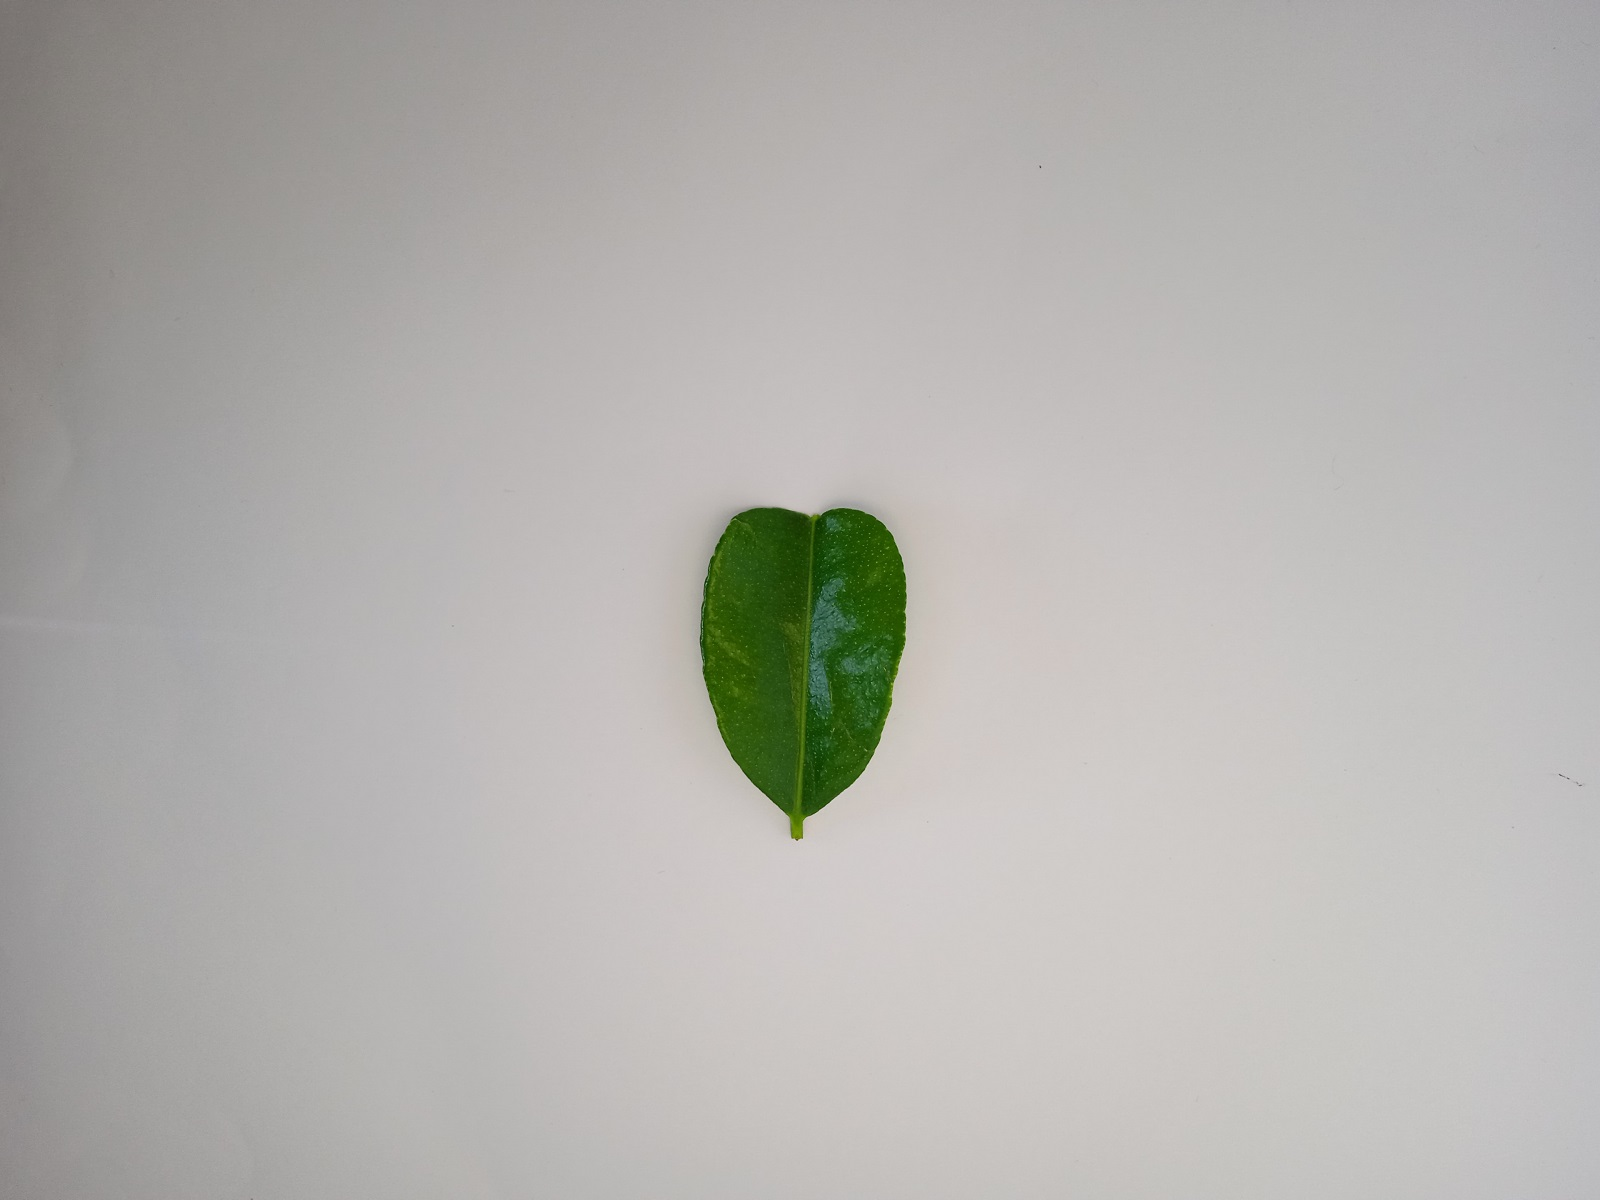

In [112]:
# menampilkan image
cv2_imshow(image)

In [113]:
print(image.shape)

(1200, 1600, 3)


In [114]:
# mengakeses nilai di pixel x=100, y=20
(b, g, r) = image[20, 100]
print("blue =" ,b)
print("green =" ,g)
print("red =" ,r)

blue = 126
green = 129
red = 134


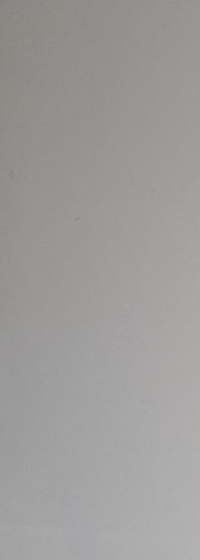

(560, 200, 3)


In [115]:
# crop image
im_crop = image[100:660, 100:300]

cv2_imshow(im_crop)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(im_crop.shape)

In [116]:
# mengcopy image
cp_image = image.copy()
print(cp_image.shape)

(1200, 1600, 3)


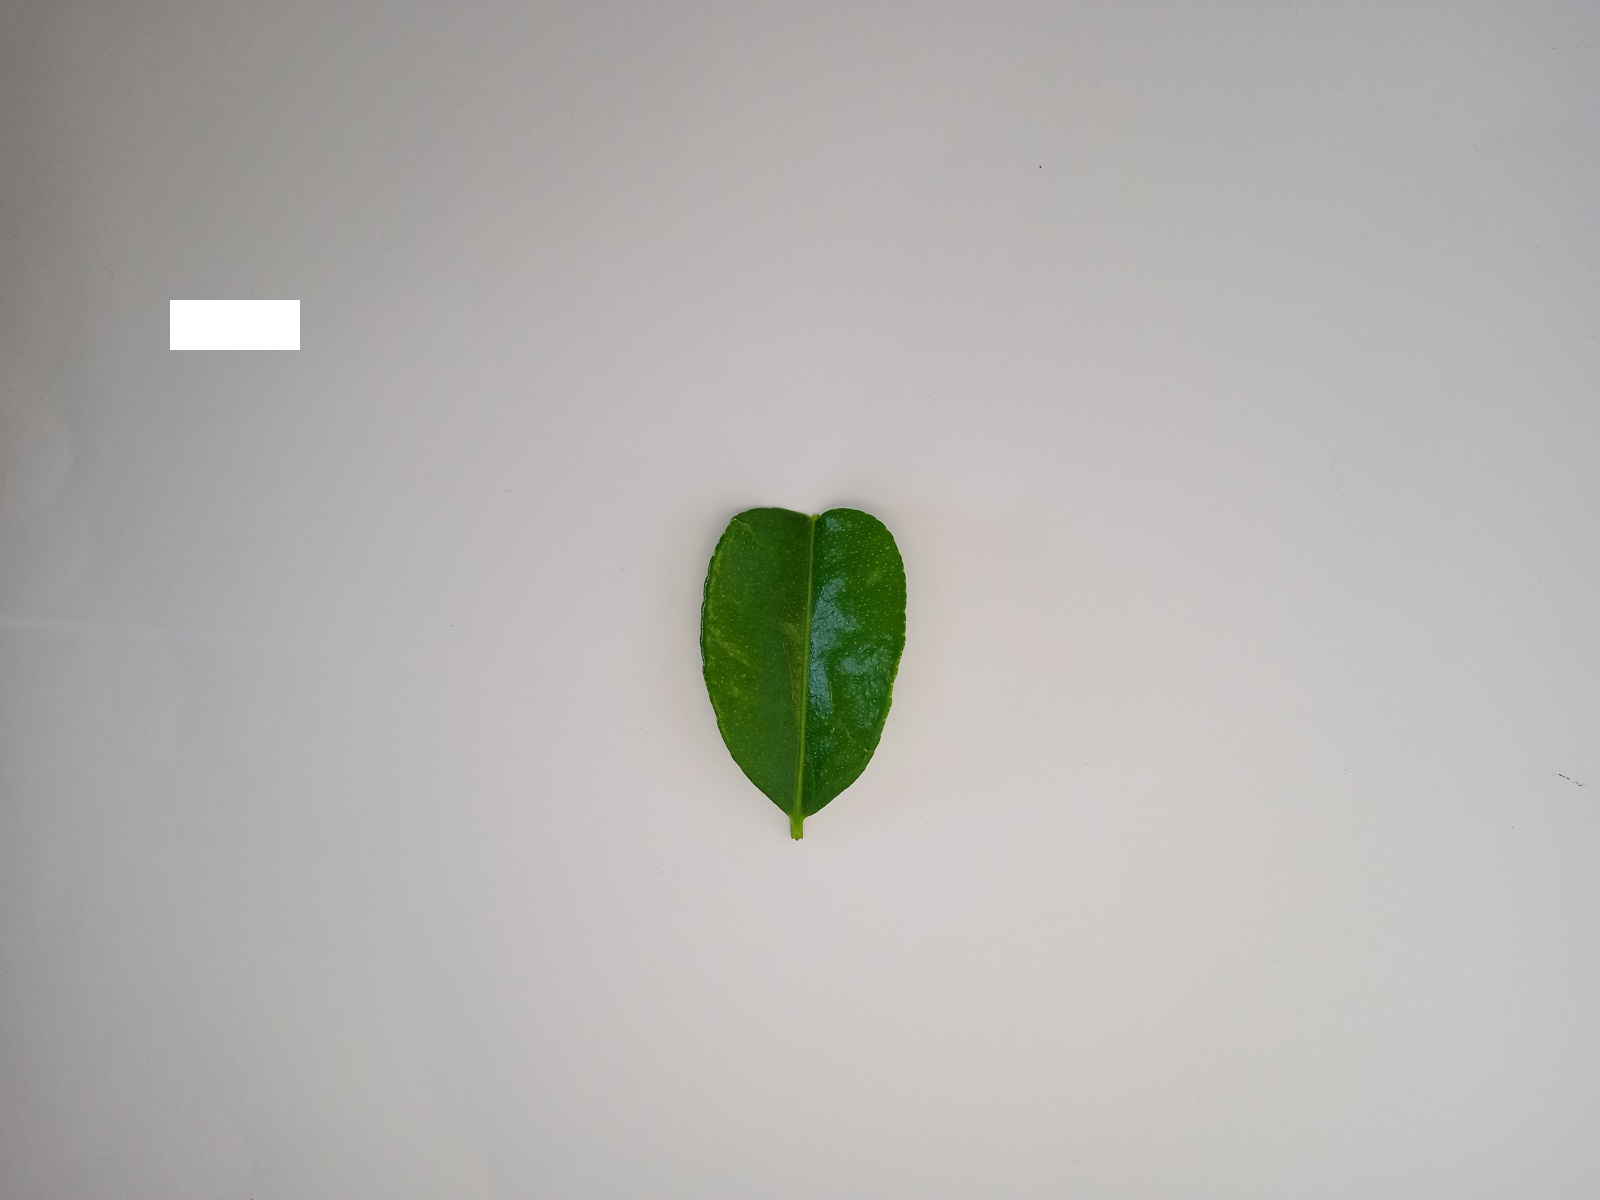

In [117]:
# mengubah nilai pixel
cp_image[300:350, 170:300] = (255, 255, 255)

cv2_imshow(cp_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

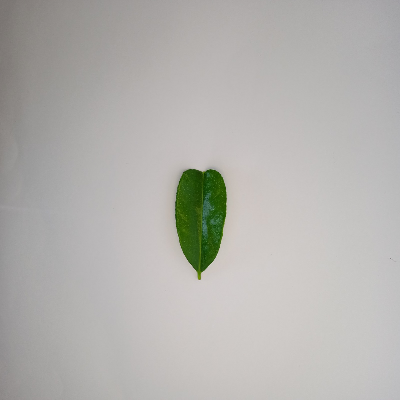

In [118]:
# resize image (ignore aspect ratio)
im_resized = cv2.resize(image, (400,400))

cv2_imshow(im_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

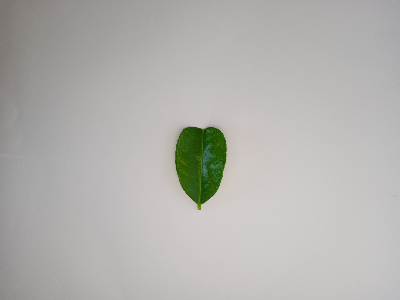

In [119]:
# resize image (Mempertahankan aspek ratio)
r = 400/image.shape[1]
dim = (400, int(image.shape[0]*r))
im_resized = cv2.resize(image, dim)

cv2_imshow(im_resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

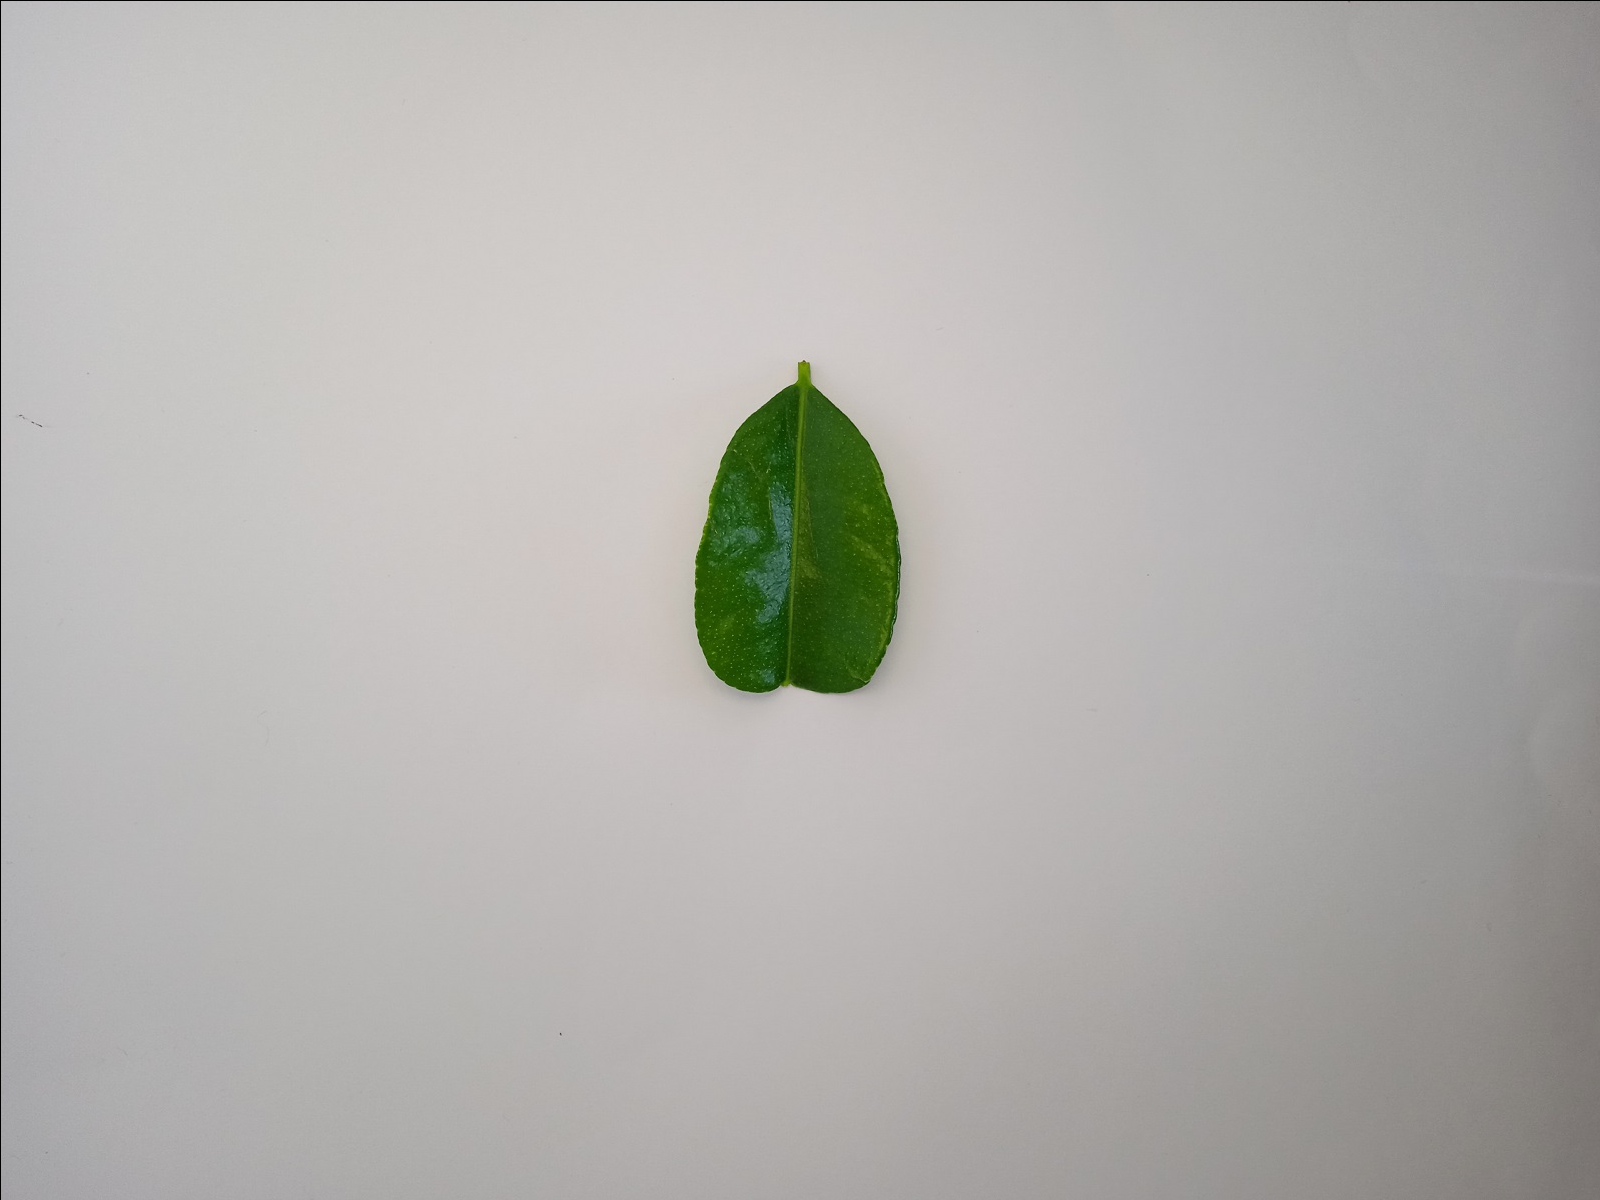

In [120]:
# rotating an image
(h, w) = image.shape[:2]
center = (w/2, h/2)

M = cv2.getRotationMatrix2D(center, 180, 1.0)
rotate = cv2.warpAffine(image, M, (w,h))

cv2_imshow(rotate)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [121]:
# menyimpan Image
cv2.imwrite("rotate.png", rotate)

True

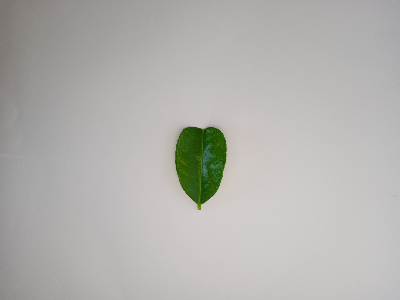

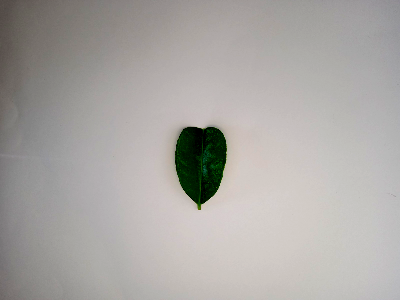

In [123]:
#adjust image contrast
import numpy as np
im_adjusted = cv2.addWeighted(im_resized, 1.5, np.zeros(im_resized.shape, im_resized.dtype), 0, -100)


cv2_imshow(im_resized)
cv2_imshow(im_adjusted)
cv2.waitKey(0)
cv2.destroyAllWindows()

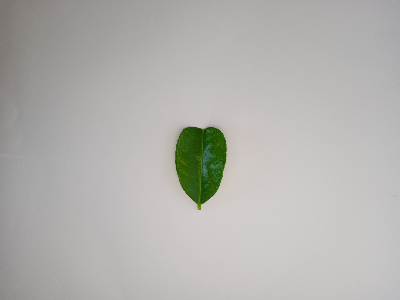

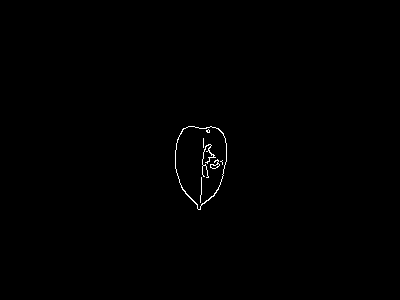

In [124]:
# detect edges
im_edges = cv2.Canny(im_resized, 100, 200)

cv2_imshow(im_resized)
cv2_imshow(im_edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

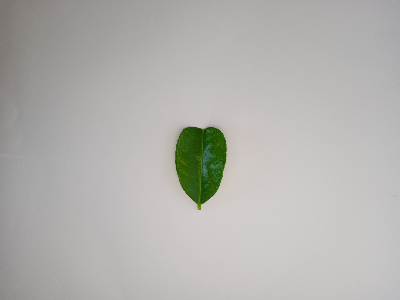

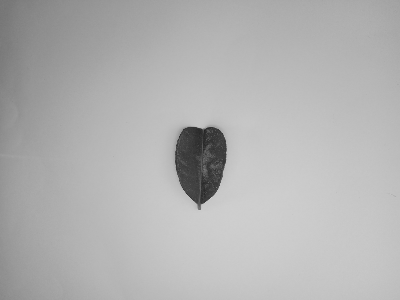

In [125]:
# covert image to greyscale
im_gray = cv2.cvtColor(im_resized, cv2.COLOR_BGR2GRAY)

cv2_imshow(im_resized)
cv2_imshow(im_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [106]:
import cv2
import glob

imdir = 'Dataset/Jeruk Nipis/'
ext = ['jpg']

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

images = [cv2.imread(file) for file in files]
i = 1
for img in images:
    r = 400 / img.shape[1]
    dim = (400, int(img.shape[0] * r))
    im_resized = cv2.resize(img, dim)
    im_gray = cv2.cvtColor(im_resized, cv2.COLOR_BGR2GRAY)
    im_name = "Dataset/Jeruk Nipis_grayscale/" + str(i) + ".jpg"
    cv2.imwrite(im_name, im_gray)
    i+=1